In [1]:
# SUPERVISED LEARNING - Linear Regression

# Load and Explore dataset

import os
import pandas as pd

path = "C:/Users/yasin/Desktop/COMP-309/Week-8"
file = "Advertising.csv"

fullpath = os.path.join(path, file)
linear_data = pd.read_csv(fullpath)
linear_data.columns.values
linear_data.shape
linear_data.describe()
linear_data.dtypes
linear_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Let us check if there is a correlation between advertisement costs on TV and the resultant sales. 

# Use the numpy package to build a function to calculate the correlation between each input variable TV,Radio & Newspaper 
# and the output Sales

import numpy as np

def corrcoeff(df, var1, var2):
    df['corrn'] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df['corrd1'] = (df[var1] - np.mean(df[var1])) ** 2
    df['corrd2'] = (df[var2] - np.mean(df[var2])) ** 2
    corrcoeffn = df.sum()['corrn']
    corrcoeffd1 = df.sum()['corrd1']
    corrcoeffd2 = df.sum()['corrd2']
    
    corrcoeffd = np.sqrt(corrcoeffd1 * corrcoeffd2)
    corrcoeff = corrcoeffn / corrcoeffd
    return corrcoeff

print(corrcoeff(linear_data,'TV','Sales'))
print(corrcoeff(linear_data,'Radio','Sales'))
print(corrcoeff(linear_data,'Newspaper','Sales'))

# A value of 0 means no correlation. A value below -0.5 or above 0.5 indicates a notable correlation, 
# and values below that suggest a less notable correlation

0.7822244248616064
0.5762225745710552
0.22829902637616528


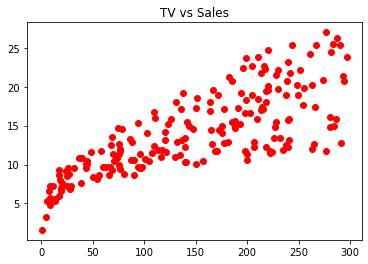

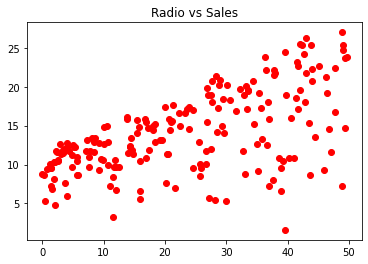

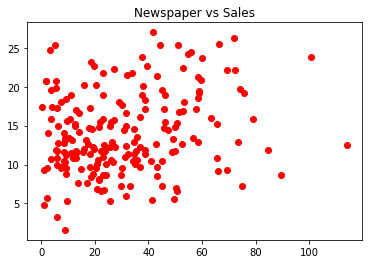

In [5]:
# Use the matplotlib module to visualize the relationships between each of the inputs and the output (sales),
# i.e. generate three scattered plots.
import matplotlib.pyplot as plt

plt.plot(linear_data['TV'], linear_data['Sales'], 'ro')
plt.title('TV vs Sales')
plt.show()

plt.plot(linear_data['Radio'], linear_data['Sales'], 'ro')
plt.title('Radio vs Sales')
plt.show()

plt.plot(linear_data['Newspaper'], linear_data['Sales'], 'ro')
plt.title('Newspaper vs Sales')
plt.show()

In [6]:
# FIRST WAY OF LINEAR REGRESSION MODEL

# Use the ols method and the statsmodel.formula.api library to build a linear regression model with TV costs 
# as the predictor (input) and sales as the predicted (output) i.e. estimate the parameters of the model.

import statsmodels.formula.api as smf

model1 = smf.ols(formula='Sales~TV',data=linear_data).fit()
model1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [18]:
# Generate the p-values and the R-squared and model summary

print(model1.pvalues)
print(model1.rsquared)
print(model1.summary())

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64
0.611875050850071
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.47e-42
Time:                        18:26:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [8]:
# Re-build the model with two predictors TV and Radio as input variables and print the parameters, p-values, rsquared and summary

model2 = smf.ols(formula='Sales~TV+Radio',data=linear_data).fit()

print(model2.params)
print(model2.pvalues)
print(model2.rsquared)
print(model2.summary())

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64
Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64
0.8971942610828956
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           4.83e-98
Time:                        14:32:29   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 

In [9]:
# a.	Create a new data frame with 2 new values for TV and Radio
x_new2 = pd.DataFrame({'TV': [50], 'Radio': [40]})

# b.	Predict using the new values
sales_pred2 = model2.predict(x_new2)
print(sales_pred2)


0    12.72861
dtype: float64


In [15]:
# SECOND WAY OF LINEAR REGRESSION MODEL

# Feature selection: using the scikit , in order to check which predictors are best as input variable to the model

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

feature_cols = ['TV', 'Radio','Newspaper']
X = linear_data[feature_cols]
Y = linear_data['Sales']

estimator = SVR(kernel="linear")
selector = RFE(estimator,n_features_to_select=2,step=1)
selector = selector.fit(X, Y)

print(selector.support_)
print(selector.ranking_)


[ True  True False]
[1 1 2]


In [16]:
# build the model using scikit-learn package, this is the more commonly used package to build data science projects. 
# This method is more elegant as it has more in-built methods to perform the regular processes associated with regression. 

# a.	Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature_cols = ['TV', 'Radio']
X = linear_data[feature_cols]
Y = linear_data['Sales']

# b.	Split the dataset into 80% for training and 20% for testing
trainX,testX,trainY,testY = train_test_split(X,Y, test_size = 0.2)

lm = LinearRegression()
lm.fit(trainX, trainY)

# c.	Print out the parameters
print (lm.intercept_)
print (lm.coef_)
zip(feature_cols, lm.coef_)
[('TV', 0.045706061219705982), ('Radio', 0.18667738715568111)]

# d.	Test the model using the Train/Test
lm.score(trainX, trainY)
lm.predict(testX)

2.848448943586458
[0.04679997 0.18361112]


array([20.75141305, 11.03248864,  8.34956114, 17.06156194, 12.39044932,
       18.36635059, 15.42548244, 14.13038997, 12.67647147,  3.63651202,
       15.10120679,  7.00687132,  9.95094819, 17.30306893, 11.20736174,
       17.26465465, 18.15464487, 10.09777861, 12.07258303, 16.38245736,
       17.78482281,  4.46234471,  8.36484661, 14.04628965,  8.15670042,
       12.03320251, 24.20339785, 23.38504308, 23.83258686, 16.83238826,
       17.15142695, 10.61272443,  7.78523014, 16.89365364, 18.95074283,
       16.22030568, 20.44098083, 15.28977715, 18.41343635,  9.09030458])